[Aufgaben](merkmale_aufgaben.ipynb)

In [1]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.constants as const
import scipy
from scipy.io import wavfile
from pylab import *
from scipy.fftpack import fft, ifft
from IPython.display import Audio

#### Aufgabe 1

Das Signal liegt als .wav-Datei vor. Die Bibliothek scipy stellt Methoden zur 
Ein- und Ausgabe von .wav-Files bereit. Zur Interpretation der Daten ist die 
Abtastfrequenz und die Bitbreite erforderlich. Die Daten stehen als Array zur Verfügung. Die Abtastfrequenz wird der Variablen <span style="font-family:Courier">fs</span> zugewiesen, 
die Daten stehen unter <span style="font-family:Courier">numarray</span>.
Die Anzeige der Werte erfolgt durch Eingabe der Variablennamen.

Stellen Sie drei verschiedene Ausschnitte des Signals von je 25, 50 und 100 ms Dauer dar! Wählen 
Sie die Zeitfenster so aus, dass möglichst charakteristische Abschnitte dargestellt werden.
Die Darstellungen werden unter <span style="font-family:Courier">dateiname_..ms.png</span> abgespeichert.

#### <font color="#FF0000">Eingabezelle</font>

In [3]:
auswahl = '57'

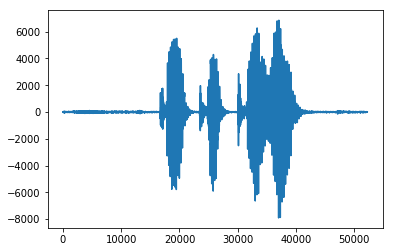

In [4]:
file_name = 'sound/' + auswahl + '.wav'
fs, numarray = wavfile.read(file_name)
plt.plot(numarray)
#numarray = numarray/max(abs(numarray))

#### <font color="#FF0000">Eingabezelle</font>

In [5]:
zf = 0.05   #Zeitfensterlänge
atw_zf1 = 10500    #Start ZF1
atw_zf2 = 11000    #Start ZF2
atw_zf3 = 18000    #Start ZF3

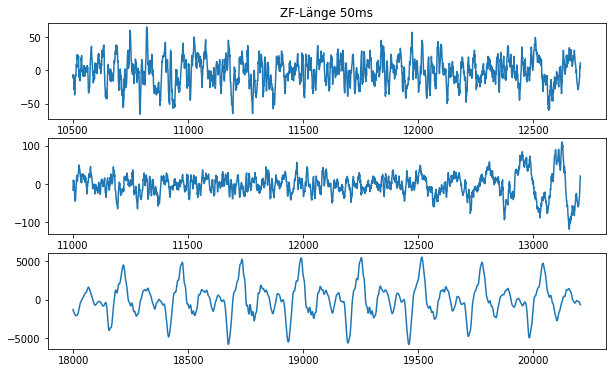

In [6]:
t = np.arange(len(numarray))
plt.figure(figsize=(10,6))
subplot(311)
n = int(round(zf * fs))
title_name = 'ZF-Länge ' + str(int(zf*1000)) + 'ms'
title(title_name)
plot(t[atw_zf1:atw_zf1+n], numarray[atw_zf1:atw_zf1+n])
subplot(312)
plot(t[atw_zf2:atw_zf2+n], numarray[atw_zf2:atw_zf2+n])
subplot(313)
plot(t[atw_zf3:atw_zf3+n], numarray[atw_zf3:atw_zf3+n])
fig_name = auswahl + '_' + str(int(zf*1000)) + 'ms.png'
savefig(fig_name)

#### Betragsspektrum für die Zeitfensterausschnitte
Für diese Zeitfenster wird das Betragsspektrum ermittelt und dargestellt.
Die Darstellungen werden unter <span style="font-family:Courier">dateiname_..hz.png</span> abgespeichert.

In [7]:
y = abs(fft(numarray[int(atw_zf1):int(atw_zf1)+n]))
f = np.linspace(0,fs/2,int(np.round(n/2)))

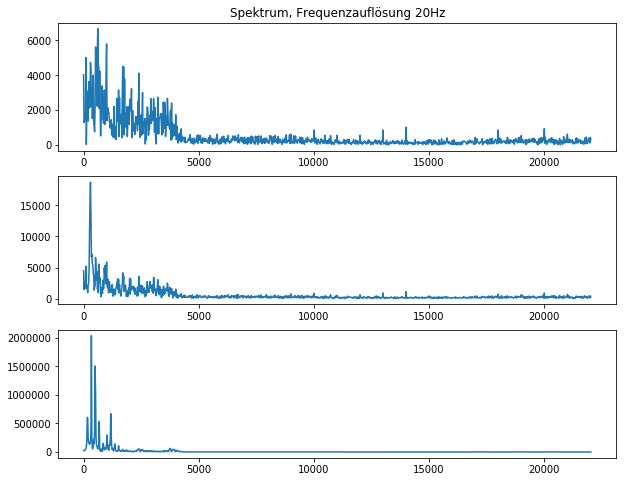

In [8]:
plt.figure(figsize=(10,8))
subplot(311)
plot(f,y[0:len(f)])
title_name = 'Spektrum, Frequenzauflösung ' + str(int(1/zf)) + 'Hz'
title(title_name)
subplot(312)
y = abs(fft(numarray[atw_zf2:atw_zf2+n]))
plot(f,y[0:len(f)])
subplot(313)
y = abs(fft(numarray[atw_zf3:atw_zf3+n]))
plot(f,y[0:len(f)])
fig_name = auswahl + '_' + str(int(1/zf)) + 'Hz.png' 
savefig(fig_name)

#### Untersuchung unterschiedlicher Zeitfensterbewertungsfunktionen 
Folgende Zeitfensterformen stehen zur Bewertung der Signalabschnitte zur Verfügung.

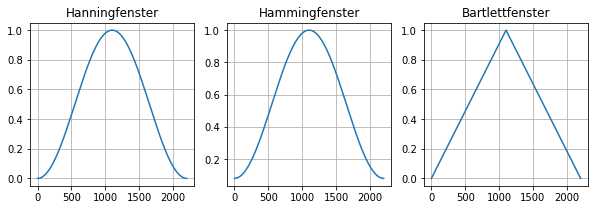

In [10]:
plt.figure(figsize=(10,3))
subplot(131)
title('Hanningfenster')
plt.grid()
plot(hanning(n))
subplot(132)
title('Hammingfenster')
plt.grid()
plot(hamming(n))
subplot(133)
title('Bartlettfenster')
plt.grid()
plot(bartlett(n))

Die ausgewählten Zeitfenster werden mit unterschiedlichen Fensterfunktionen bewertet und in den Frequenzbereich transformiert. Die Ergebnisse im Zeit- und Frequenzbereich werden gespeichert.

#### <font color="#FF0000">Eingabezelle</font>

In [11]:
window = hanning(n)
wform = 'Hanning'
#window = hamming(n)
#wform = 'Hamming'
#window = bartlett(n)
#wform = 'Bartlett'

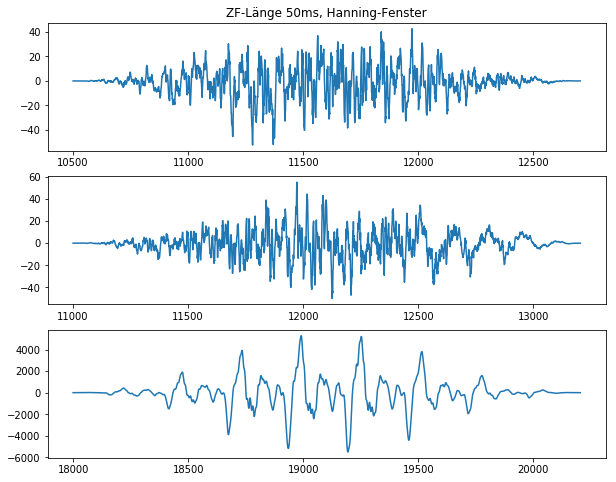

In [12]:
plt.figure(figsize=(10,8))
subplot(311)
title_name = 'ZF-Länge ' + str(int(zf*1000)) + 'ms, ' + wform + '-Fenster'
title(title_name)
wdat1 = window * numarray[atw_zf1:atw_zf1+n]
wdat2 = window * numarray[atw_zf2:atw_zf2+n]
wdat3 = window * numarray[atw_zf3:atw_zf3+n]
plot(t[atw_zf1:atw_zf1+n], wdat1)
subplot(312)
plot(t[atw_zf2:atw_zf2+n], wdat2)
subplot(313)
plot(t[atw_zf3:atw_zf3+n], wdat3)
fig_name = auswahl + '_' + str(int(zf*1000)) + 'ms_' + wform + '.png'
savefig(fig_name)

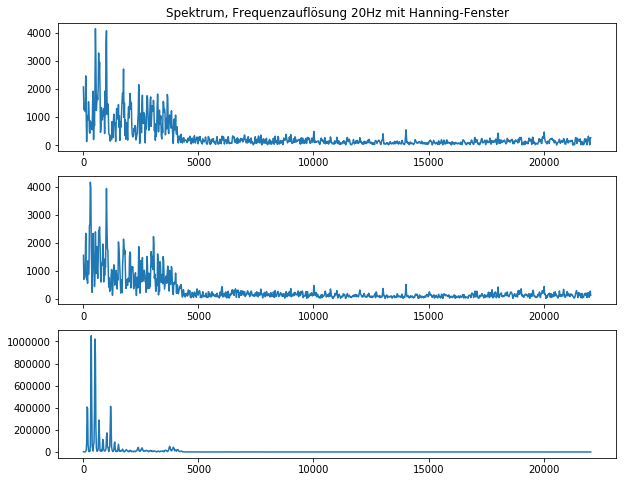

In [13]:
y = abs(fft(wdat1))
plt.figure(figsize=(10,8))
subplot(311)
plot(f,y[0:len(f)])
title_name = 'Spektrum, Frequenzauflösung ' + str(int(1/zf)) + 'Hz mit ' + wform + '-Fenster'
title(title_name)
subplot(312)
y = abs(fft(wdat2))
plot(f,y[0:len(f)])
subplot(313)
y = abs(fft(wdat3))
plot(f,y[0:len(f)])
fig_name = auswahl + '_' + str(int(1/zf)) + 'Hz_' + wform + '.png' 
savefig(fig_name)

#### Spektrum des vollständigen Signals

Text(0.5,1,'Spektrum Gesamtsignal, Frequenzauflösung 0.84Hz')

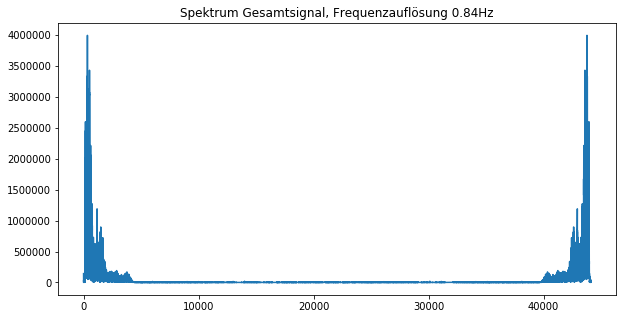

In [14]:
y = abs(fft(numarray))
plt.figure(figsize=(10,5))
f = np.linspace(0,fs,len(numarray))
zf = len(numarray)/fs
plot(f,y)
title_name = 'Spektrum Gesamtsignal, Frequenzauflösung ' + str((round(1/zf*100))/100) + 'Hz'
title(title_name)


#### Kurzzeitspektrum des Signals

Untersuchen Sie die Auswirkungen von 
* Zeitfensterlänge
* Überlappung
* Zeitfensterform 

auf das Analyseergebnis

In [17]:
atw_zf = 1102 # Anz. Abtastwerte im Zeitfenster
fsr = 441 # Überlappung

Text(0.5,1,'Kurzzeitspektrum sound/57.wav Rechteckfenster')

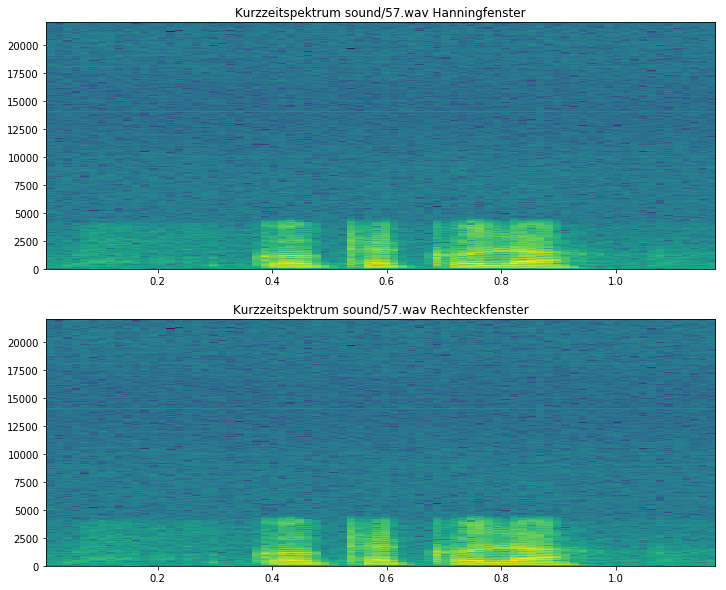

In [18]:
plt.figure(figsize=(12,10))
subplot(211)
# Zeitfensterform
zff = mlab.window_hanning
#zff = None
#zff = bartlett(atw_zf)
# Zeitfenstername
zfn = ' Hanning'
#zfn = ' Rechteck'
#zfn = ' Bartlett'
specgram(numarray, NFFT=atw_zf, Fs=fs, noverlap=fsr, cmap=None, window = zff)
name = 'Kurzzeitspektrum ' + file_name + zfn + 'fenster'
title(name)

subplot(212)
# Anz. Abtastwerte im Zeitfenster
# Zeitfensterform
#zff = mlab.window_hanning
zff = None
#zff = bartlett(atw_zf)
# Zeitfenstername
#zfn = ' Hanning'
zfn = ' Rechteck'
#zfn = ' Bartlett'
specgram(numarray, NFFT=atw_zf, Fs=fs, noverlap=fsr, cmap=None, window=zff)
name = 'Kurzzeitspektrum ' + file_name + zfn + 'fenster'
title(name)

#### Spektren für stationäre Abschnitte
Aus den Kurzzeitspektren können stationäre, für einen Laut typische Abschnitte ermittelt werden.
Suchen Sie typische Abschnitte heraus und stellen Sie das Betragsspektrum mit einer geeigneten 
Zeitfensterlänge dar.

In [21]:
# Abtastwert in der Mitte des Zeitfensters
zeitmarke = 0.45
zf_laenge = 1102

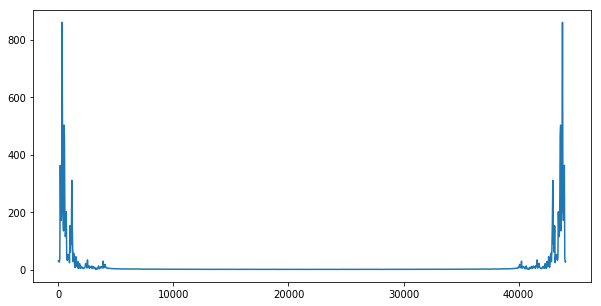

In [22]:
plt.figure(figsize=(10,5))
m_atw = zeitmarke * fs
atw1 = round(m_atw) - round(zf_laenge/2)
atw2 = atw1 + zf_laenge
asp_typ = abs(fft(numarray[atw1:atw2]))/zf_laenge
f_typ = np.linspace(0,fs,len(asp_typ))
plot(f_typ, asp_typ)

#### Weiterführende Aufgaben

- Codieren Sie die wav-Dateien vor der Bearbeitung so um, dass die Ergebnisse vergleichbar werden!
- Was wäre dazu erforderlich?
- Ermitteln Sie eine Amplitudenstatistik für die wav-Dateien!